<a href="https://colab.research.google.com/github/itsmeale/complex-systems/blob/master/Simulacao_Atendimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulação de Atendimento

## Bibliotecas necessárias

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
from tqdm import tqdm

# Para documentacao do codigo
from typing import List

## Implementações

### Simulação

In [0]:
@jit(nopython=False)
def simulacao(n_guiches: int, lambd: int, tempo_atendimento: float, t_max: int) -> List[int]:
    """Realiza uma simulacao e retorna a quantidade
    de requicioes aceitas e rejeitadas.
    """
    guiches = np.zeros(n_guiches)
    aceitas = rejeitadas = tempo_atual = 0
    z = expovariate(lambd)

    while tempo_atual + z <= t_max:
        tempo_atual = tempo_atual + z
        prox_linha_disponivel = np.argmin(guiches)

        if guiches[prox_linha_disponivel] <= tempo_atual:
            guiches[prox_linha_disponivel] = tempo_atual + tempo_atendimento
            aceitas += 1
        else:
            rejeitadas += 1

        z = expovariate(lambd)

    return [aceitas, rejeitadas]

In [0]:
@jit(nopython=False)
def rep_simulacao(n_guiches: int, lambd: int, tempo_atendimento: float, t_max: int, N: int) -> List[List[int]]:
    """Realiza N simulacoes e retorna a lista de 
    requisicoes aceitas e rejeitadas em cada simulacao
    """
    X = np.array(list())
    Y = np.array(list())
    np_append = np.append
    
    for i in range(N):
        x, y = simulacao(n_guiches, lambd, tempo_atendimento, t_max)
        X = np_append(X, x)
        Y = np_append(Y, y)

    return X, Y, Y/(X+Y)

## Parâmetros

In [0]:
n_guiches = 2 #@param {type: "slider", min: 1, max: 10}
tempo_atendimento = 2 #@param {type: "slider", min: 1, max: 15, step: 0.1}
lambd = 2 #@param {type: "slider", min: 1, max: 10}
t_max = 50 #@param {type: "slider", min: 50, max: 100}
N = 20000 #@param {type: "number"}

## Experimento

In [0]:
X, Y, W = rep_simulacao(n_guiches, tempo_atendimento, lambd, t_max, N)

In [154]:
print(f"Média de requisições aceitas: {X.mean()}")
print(f"Média de requisições rejeitadas: {Y.mean()}")
print(f"Proporção de requisições rejeitadas: {(Y/(X+Y)).mean()}")

Média de requisições aceitas: 38.88005
Média de requisições rejeitadas: 61.12125
Proporção de requisições rejeitadas: 0.6082709410605356


## Visualização dos resultados

### Histograma de requisições aceitas e rejeitadas



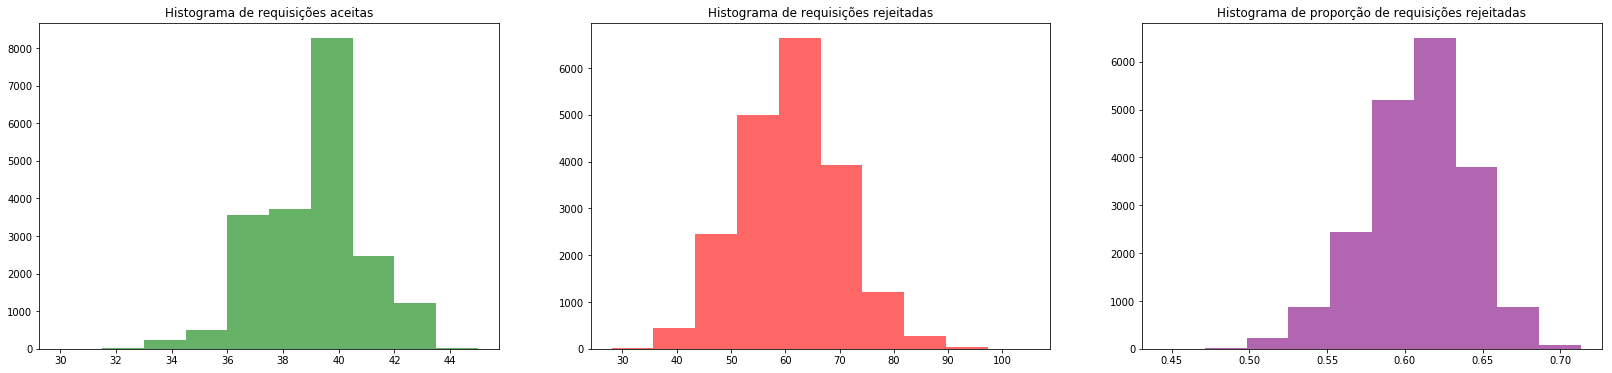

In [155]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(28, 6))
ax1.hist(X, alpha=.6, color='green')
ax1.set_title('Histograma de requisições aceitas')
ax2.hist(Y, alpha=.6, color='red')
ax2.set_title('Histograma de requisições rejeitadas')
ax3.hist(W, alpha=.6, color='purple')
ax3.set_title('Histograma de proporção de requisições rejeitadas')
plt.show()

### Convergência da média de requisições rejeitadas

In [0]:
iters = list(range(100, N, 100))
E = list()

for i in range(len(iters)):
    last_iter = iters[i]
    E.append(sum(W[1:last_iter]/last_iter))

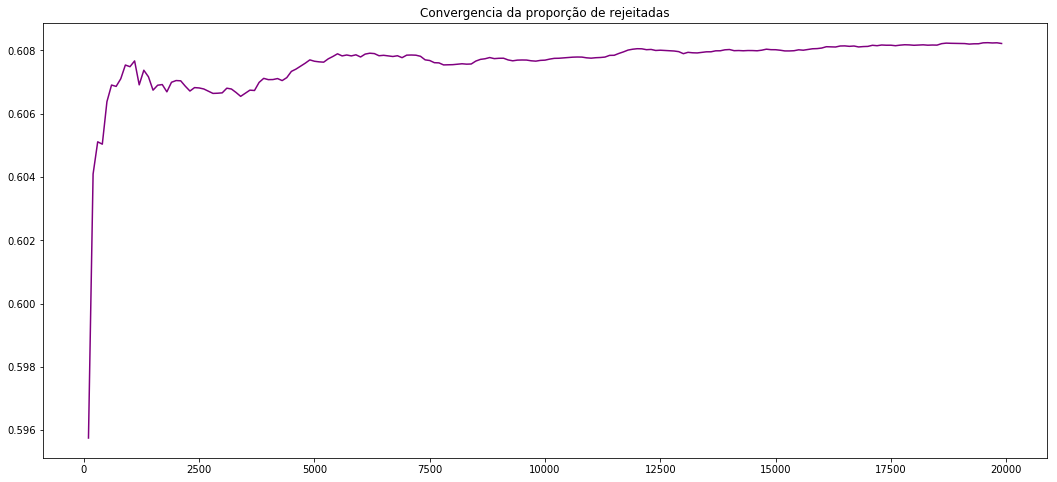

In [157]:
fig, axes = plt.subplots(1,  figsize=(18, 8))
plt.plot(iters, E, color='purple')
plt.title('Convergencia da proporção de rejeitadas')
plt.show()